In [17]:
import numpy as np
from scipy.linalg import expm
from math import pi
import matplotlib.pyplot as plt

In [18]:
def rhs(t):
    return np.array([[np.sin(2*pi*t),t-5],[t+1,-t]])

In [19]:
ts = 4000
a = 0
b = 1
t = np.linspace(a,b,ts+1)
k = (b-a)/ts

y = np.zeros([2,ts+1])
y[:,0] = [1,1]

Magnus integrator using 2-point Gauss Quadrature rule with nodes $c_{1,2} = \frac{1}{2} \mp \frac{\sqrt{3}}{6}$.

In [20]:
c1 = 1/2 - np.sqrt(3)/6
c2 = 1/2 + np.sqrt(3)/6

def comm(rhs,tn): 
    #return the commutator
    return np.matmul(rhs(tn+c2*k),rhs(tn+c1*k)) - np.matmul(rhs(tn+c1*k),rhs(tn+c2*k))


for n in range(0,ts):
    y[:,n+1] = expm(0.5*k*( rhs(t[n]+c1*k) + rhs(t[n]+c2*k) ) + (np.sqrt(3)/12)*(k**2)*comm(rhs,t[n]))@y[:,n]

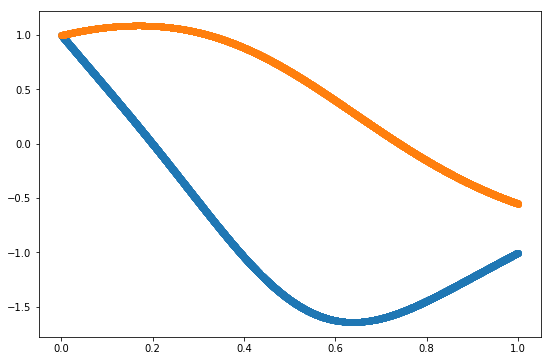

In [21]:
plt.figure(figsize=(9,6))
plt.plot(t,y[0,:],'-o',t,y[1,:],'-o')
#plt.plot(t,np.exp(-t),'-g')
plt.show()

Convergence for 
$$Y'(t)= A(t) Y(t)$$

where $$A(t) = \begin{bmatrix}
\sin(2 \pi t) && t-5 \\
t+1 && -t
\end{bmatrix}$$

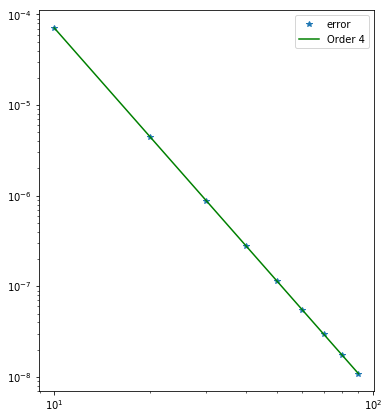

In [22]:
err = []
yRif = y #reference solution

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(0.5*k*(rhs(t[n]+c1*k) + rhs(t[n]+c2*k)) + (np.sqrt(3)/12)*(k**2)*comm(rhs,t[n]))@y[:,n]

    
    #err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))
    err.append(np.linalg.norm(y[:,-1] - yRif[:,-1],np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange,err[-1] * (tsrange[-1] / tsrange) ** 4,'g',label='Order 4')
plt.legend()
plt.show()

Convergence for 

$$Y'(t)= A Y(t) $$

where $$A = \begin{bmatrix}
-1 && 0 \\
0 && -1
\end{bmatrix}$$

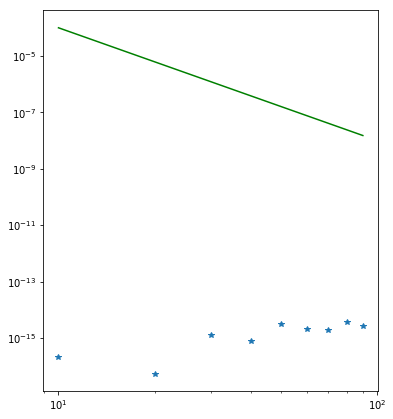

In [23]:
def rhs(t):
    return np.array([[-1,0],[0,-1]])


def uex(t):
    return np.array([np.exp(-t),np.exp(-t)])

err = []
yRif = y

tsrange = np.arange(10,100,10)
for ts in tsrange:
    t = np.linspace(0,1,ts+1)
    k = 1/ts
    y = np.zeros([2,ts+1])
    y[:,0] = [1,1]
    for n in range(0,ts):
        y[:,n+1] = expm(0.5*k*(rhs(t[n]+c1*k) + rhs(t[n]+c2*k)) + (np.sqrt(3)/12)*(k**2)*comm(rhs,t[n]))@y[:,n]
    
    err.append(np.linalg.norm(y[:,-1] - uex(t[-1]),np.Inf))


plt.figure(figsize=(6,7))
plt.loglog(tsrange,err,'*',label='error')
plt.loglog(tsrange, 1/tsrange**4,'g',label='Order 2')
plt.show()